### Cropping the images based on densepose bbox and saving picture wise densepose information in a directory


In [2]:
import sys
import pickle
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
sys.path.append("/media/tensor/EXTDRIVE/projects/virtual-try-on/densepose/detectron2/projects/DensePose")

In [3]:
image_path = "./../images/model_images/"

In [4]:
from densepose.data.structures import DensePoseResult

In [5]:
def get_iuv_arr(pose_data):
    result_encoded = pose_data.results[0]
    iuv_arr = DensePoseResult.decode_png_data(*result_encoded)
    return iuv_arr

In [6]:
with open("./../images/model_images_dense.pkl", "rb") as f:
    model_dense = pickle.load(f)

In [7]:
len(model_dense)

6611

In [8]:
model_dense[0]

{'file_name': '/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_data/images/model_images/VM421E0ZL-K11@12.jpg',
 'scores': tensor([0.9999, 0.5414, 0.5414]),
 'pred_boxes_XYXY': tensor([[ 145.0855,   33.9767,  886.1715, 1341.1813],
         [ 934.9233, 1020.1758,  934.9993, 1076.4491],
         [ 934.9420, 1052.0684,  934.9995, 1106.8463]]),
 'pred_densepose': <densepose.data.structures.DensePoseResult at 0x7f82f8184518>}

In [9]:
image_info = model_dense[0]

In [10]:
image_name = image_info["file_name"].split("/")[-1]
image_name

'VM421E0ZL-K11@12.jpg'

In [11]:
image_name

'VM421E0ZL-K11@12.jpg'

In [12]:
image = Image.open(image_path + image_name)

In [13]:
bbox = image_info["pred_boxes_XYXY"][0]
bbox

tensor([ 145.0855,   33.9767,  886.1715, 1341.1813])

In [14]:
image = image.crop(image_info["pred_boxes_XYXY"][0].numpy())

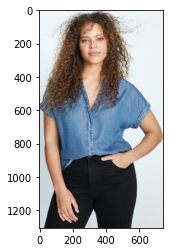

In [15]:
plt.imshow(image)

In [16]:
image.save("new_image.jpg")

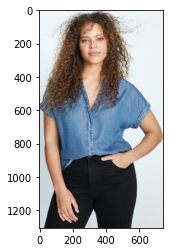

In [17]:
plt.imshow(image)

In [18]:
image.size

(741, 1307)

In [19]:
image_dense = get_iuv_arr(image_info["pred_densepose"])

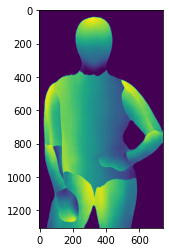

In [20]:
plt.imshow(image_dense[2])

In [18]:
type(image_dense)

numpy.ndarray

In [22]:
np.save('data.npy', image_dense)

In [23]:
image_dense = np.load('data.npy')

In [24]:
image_dense.shape

(3, 1334, 722)

In [21]:
# looping throuh all the dense data and saving them in dense folder as well as cropping images with bbox information
count = 0
for idx, dense in tqdm(enumerate(model_dense)):
    image_name = dense["file_name"].split("/")[-1]
    try:
        dense_info = get_iuv_arr(dense["pred_densepose"])
        np.save("./../images/model_images_dense/" + image_name.split(".")[0] + ".npy", dense_info)
        bbox = dense["pred_boxes_XYXY"][0].numpy()
        image = Image.open(image_path + image_name)
        image = image.crop(bbox)
        image.save("./../images/model_images_cropped/" + image_name)
    except:
        count = count + 1
        print(idx)
        
print("total wrong counts")
print(count)

1179

total wrong counts
1


In [9]:
model_dense[49]

{'file_name': '/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_data/images/model_images/ON321E1R9-A11@14.jpg',
 'scores': tensor([]),
 'pred_boxes_XYXY': tensor([], size=(0, 4)),
 'pred_densepose': <densepose.data.structures.DensePoseResult at 0x7fa9f275bb70>}

In [9]:
model_dense[77]

{'file_name': '/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_data/images/model_images/ON321E1RN-M11@10.jpg',
 'scores': tensor([0.7805, 0.5414, 0.5414, 0.0521]),
 'pred_boxes_XYXY': tensor([[ 384.2278,   43.9993, 1476.1696, 2600.0000],
         [1800.6932,  142.0287, 1800.9972,  168.7634],
         [1800.9940,  151.0532, 1801.0000,  177.9734],
         [ 192.5736, 1346.5244, 1481.1198, 2583.4004]]),
 'pred_densepose': <densepose.data.structures.DensePoseResult at 0x7faee5a78668>}

In [10]:
for i in model_dense:
    if i["file_name"].split("/")[-1] == "0HC21E00B-J11@4.jpg":
        hello = i

In [11]:
hello

{'file_name': '/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_data/images/model_images/0HC21E00B-J11@4.jpg',
 'scores': tensor([0.5414, 0.5414, 0.5414, 0.5414, 0.1124]),
 'pred_boxes_XYXY': tensor([[1800.7152,  142.0464, 1800.9974,  170.1126],
         [1800.7780,   76.7208, 1800.9978,  105.8155],
         [1800.8727,  160.1520, 1800.9988,  188.2617],
         [1800.7094,  151.2859, 1800.9972,  179.2829],
         [ 207.1587,  215.1074, 1576.2743, 2599.5520]]),
 'pred_densepose': <densepose.data.structures.DensePoseResult at 0x7faee57f1f60>}

In [29]:
image_dense = get_iuv_arr(hello["pred_densepose"])

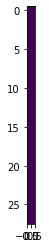

In [32]:
plt.imshow(image_dense[0])

In [27]:
im=cv2.imread('/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_data/images/model_images_cropped/0HC21E00B-J11@4.jpg')

In [28]:
cv2.imwrite("hello.png", im)

False